## Detección de objetos en imágenes
Detectar objetos en imágenes es una tarea clásica en visión por computador, y existen distintos modelos para ello, como DETR (End-to-End Object Detection) model with ResNet-50 backbone , estos modelos son más complejos que los utilizados anteriormente. Aquí lo probamos bajo una imagen extraída de Pixabay.

In [1]:
from transformers import pipeline

# Avoid some warning
%env TOKENIZERS_PARALLELISM=false

2025-01-09 09:05:36.778712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 09:05:36.778746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 09:05:36.779728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 09:05:36.785018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 09:05:37.324383: W tensorflow/compiler/tf2

env: TOKENIZERS_PARALLELISM=false


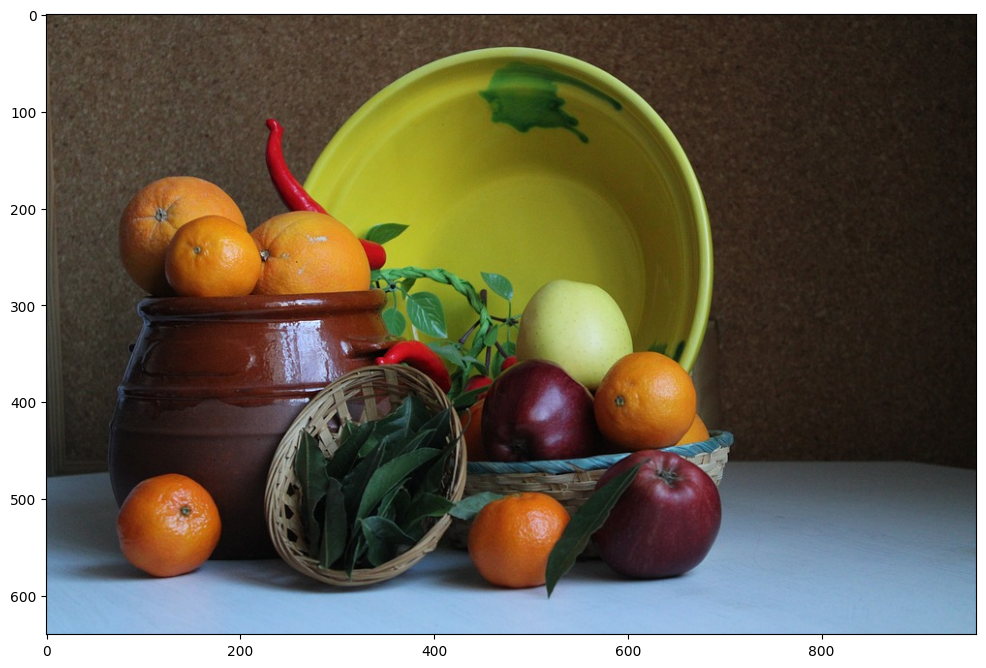

In [2]:
# Some aditional library imports
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Download an image
url = "https://cdn.pixabay.com/photo/2021/12/23/05/27/still-life-6888656_960_720.jpg"
image_data = requests.get(url, stream=True).raw
image_sl = Image.open(image_data)

# Convert PIL Image, convert it to a format suitable for matplotlib
image_np = np.array(image_sl)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 9))  # Width, height in inches
ax.imshow(image_np)

plt.show()

In [3]:
# Allocate and execute a pipeline for object detection
object_detector = pipeline(model='facebook/detr-resnet-50')
predictions = object_detector(image_sl)

print("Number of detected objects:", len(predictions))
predictions

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Device set to use cuda:0


Number of detected objects: 15


[{'score': 0.9951804876327515,
  'label': 'orange',
  'box': {'xmin': 72, 'ymin': 473, 'xmax': 183, 'ymax': 581}},
 {'score': 0.9932603240013123,
  'label': 'orange',
  'box': {'xmin': 71, 'ymin': 166, 'xmax': 210, 'ymax': 294}},
 {'score': 0.9963616728782654,
  'label': 'apple',
  'box': {'xmin': 562, 'ymin': 451, 'xmax': 697, 'ymax': 585}},
 {'score': 0.9530723094940186,
  'label': 'orange',
  'box': {'xmin': 646, 'ymin': 409, 'xmax': 683, 'ymax': 444}},
 {'score': 0.9533135294914246,
  'label': 'bowl',
  'box': {'xmin': 224, 'ymin': 361, 'xmax': 427, 'ymax': 592}},
 {'score': 0.9907733201980591,
  'label': 'orange',
  'box': {'xmin': 213, 'ymin': 204, 'xmax': 332, 'ymax': 294}},
 {'score': 0.9932217597961426,
  'label': 'orange',
  'box': {'xmin': 564, 'ymin': 348, 'xmax': 674, 'ymax': 450}},
 {'score': 0.9601836800575256,
  'label': 'orange',
  'box': {'xmin': 118, 'ymin': 208, 'xmax': 222, 'ymax': 294}},
 {'score': 0.5855358839035034,
  'label': 'orange',
  'box': {'xmin': 209, 'y

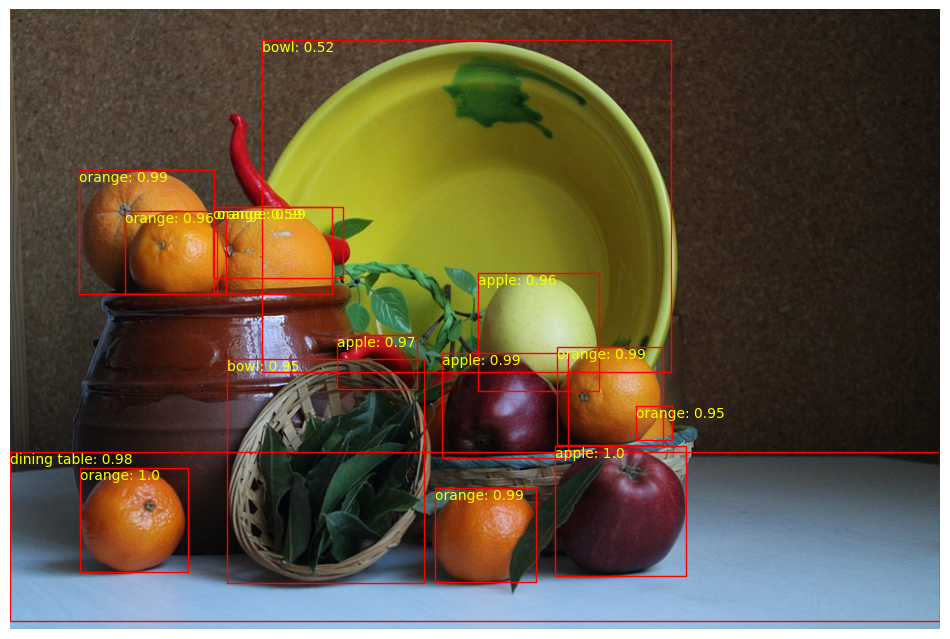

In [4]:
# Create a matplotlib figure and axis
# from https://wellsr.com/python/zero-shot-object-detection-with-hugging-face-transformers/
fig, ax = plt.subplots(figsize=(12, 9))  # Width, height in inches
ax.imshow(image_np)

# Create a rectangle for each object
for prediction in predictions:
    box = prediction['box']
    label = prediction['label']
    score = prediction['score']
    xmin, ymin, xmax, ymax = box.values()
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='red', facecolor='none')

    # Add the rectangle to the axes
    ax.add_patch(rect)

    # Add text
    plt.text(xmin, ymin, f"{label}: {round(score,2)}", color='yellow', fontsize=10, verticalalignment='top')

# Display the image
plt.axis('off')
plt.show()

In [5]:
# Showing the object detector model
print(object_detector.model)
#object_detector.model.summary()

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [ ]:
# !nvidia-smi

# Reiniciando kernel para limpiar la memoria de la GPU
!pkill -9 -f ipykernel_launcher